# ML Application for Attrition Rate

## Imporing libraries required

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## Load data into dataframe

In [2]:
def get_data_as_df(path):
    return pd.read_csv(path)

In [3]:
dept_data = get_data_as_df('./data/preprocessing/dept_data.csv')
employee_data = get_data_as_df('./data/preprocessing/employee_data.csv')
employee_details = get_data_as_df('./data/preprocessing/employee_details.csv')

## A view on how the data looks like

In [4]:
dept_data.head()

dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray

In [5]:
employee_details.head()

employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married

In [6]:
employee_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0        NaN              NaN         0.866838           6   
1            134.0        NaN              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0       126150  
3                NaN     low      0.152974   Left     4.0       125346  
4                NaN  medium      0.434845   Left     3.0       113707

- syntax for renaming.
df.rename(columns={'actual_name':'new_name'})

In [9]:
# employee_data = employee_data.merge(dept_data, left_on=['department'], right_on=['dept_id'], how='left')
dept_data.rename(columns={'dept_id':'department'}, inplace=True)

In [10]:
dept_data.head()

department    dept_name              dept_head
0     D00-IT           IT             Henry Adey
1     D00-SS        Sales        Edward J Bayley
2     D00-TP         Temp        Micheal Zachrey
3    D00-ENG  Engineering  Sushant Raghunathan K
4     D00-SP      Support         Amelia Westray

In [11]:
dept_data.columns

Index(['department', 'dept_name', 'dept_head'], dtype='object')

## A view on null records on each dataframe before consolidation

In [12]:
dept_data.isnull().sum()

department    0
dept_name     0
dept_head     0
dtype: int64

In [14]:
employee_data.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [13]:
employee_details.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

## merge all dataframes to consolidate records

- merging two dataframes usually has how [inner, left] and on [common_columsn]

In [15]:
print(employee_data.shape)
employee_data = employee_data.merge(dept_data, on=['department'], how='left')
print(employee_data.shape)
employee_data.head()

(14150, 11)
(14150, 13)


avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0        NaN              NaN         0.866838           6   
1            134.0        NaN              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  \
0                NaN  medium      0.134415   Left     4.0       124467   
1                NaN     low      0.511041   Left     3.0       112210   
2                NaN  medium      0.405101   Left     3.0       126150   
3                NaN     low      0.152974   Left     4.0       125346   
4                NaN  medium      0.434845   Left     3.0       113707   

  dept_name        dept_head  
0       NaN              NaN  
1       NaN              NaN  
2     Sales  Edward J Bayley  
3   Support   Amelia Westray  
4     Sales  Edward J Bayley

In [16]:
employee_data = employee_data.merge(employee_details, on='employee_id', how='left')

In [17]:
employee_data.shape

(14150, 16)

In [18]:
# consolidated data looks like this
employee_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0        NaN              NaN         0.866838           6   
1            134.0        NaN              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  \
0                NaN  medium      0.134415   Left     4.0       124467   
1                NaN     low      0.511041   Left     3.0       112210   
2                NaN  medium      0.405101   Left     3.0       126150   
3                NaN     low      0.152974   Left     4.0       125346   
4                NaN  medium      0.434845   Left     3.0       113707   

  dept_name        dept_head   age  gender marital_status  
0       NaN              NaN  42.0  Female        Married  
1       NaN              NaN  23.0  Female      Unmarried  
2     Sales  Edward J Bayley  24.0  Female      Unmarried  
3   Support   Amelia Westray  51.0  Female        Married  
4     Sales  Edward J Bayley  23.0  Female      Unmarried

In [19]:
employee_data.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dept_name              914
dept_head              914
age                      5
gender                   5
marital_status           5
dtype: int64

In [20]:
employee_data['department'].unique()

array([nan, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

## handling null values

### treating null values for department, dept_name, dept_head

In [21]:
employee_data['department'].value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
NaN         707
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [22]:
employee_data.loc[employee_data['department']=='-IT', 'department']

212      -IT
278      -IT
367      -IT
410      -IT
562      -IT
        ... 
13611    -IT
13637    -IT
13655    -IT
13862    -IT
13942    -IT
Name: department, Length: 207, dtype: object

In [23]:
# errored out as we have -IT pattern for correct records as well
# employee_data['department'] = employee_data['department'].str.replace('-IT', 'D00-IT')
employee_data.loc[employee_data['department']=='-IT', 'department'] = 'D00-IT'

In [24]:
employee_data['department'].value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
NaN         707
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [20]:
employee_data.loc[employee_data['department']=='D00-IT', 'dept_name'] = 'IT'
employee_data.loc[employee_data['department']=='D00-IT', 'dept_head'] = 'Henry Adey'

In [25]:
# looking at the below data, we can replace the nulls with
# either D00-ENG or D00-PD. for now, we shall replace with D00-PD
# we can try with D00-ENG as a second model.
employee_data.groupby('department', dropna=False).agg(
    {'avg_monthly_hrs':['mean', 'count', 'nunique', 'max', 'min']}
)

avg_monthly_hrs                            
                      mean count nunique    max    min
department                                            
D00-AD          200.994286   175     106  300.0  105.0
D00-ENG         202.507184  2575     209  310.0   97.0
D00-FN          201.382069   725     176  310.0   97.0
D00-IT          202.253666  1364     194  308.0   96.0
D00-MN          200.655987   593     161  307.0   97.0
D00-MT          199.839264   815     181  310.0   96.0
D00-PD          199.783626   855     182  310.0   98.0
D00-PR          199.867052   173     111  308.0  111.0
D00-SP          200.731661  2113     204  310.0   96.0
D00-SS          200.878361  3905     214  310.0   96.0
D00-TP           99.533333   150      73  143.0   49.0
NaN             198.950495   707     175  310.0   98.0

In [26]:
employee_data.loc[employee_data['department'].isnull(), 'department'] = 'D00-PD'

In [30]:
dept_data.head(15)

department    dept_name              dept_head
0      D00-IT           IT             Henry Adey
1      D00-SS        Sales        Edward J Bayley
2      D00-TP         Temp        Micheal Zachrey
3     D00-ENG  Engineering  Sushant Raghunathan K
4      D00-SP      Support         Amelia Westray
5      D00-FN      Finance              Aanchal J
6      D00-PR  Procurement            Louie Viles
7      D00-AD        Admin          Evelyn Tolson
8      D00-MN   Management          Ellie Trafton
9      D00-MT    Marketing           Reuben Swann
10     D00-PD      Product          Darcy Staines

In [31]:
# Engineering	Sushant Raghunathan K
employee_data.loc[employee_data['department']=='D00-PD', 'dept_name'] = 'Product'
employee_data.loc[employee_data['department']=='D00-PD', 'dept_head'] = 'Darcy Staines'

In [33]:
employee_data.loc[employee_data['dept_name'].isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
212              137.0     D00-IT              NaN         0.543217   
278              262.0     D00-IT              NaN         0.901248   
367              134.0     D00-IT              NaN         0.508337   
410              267.0     D00-IT              NaN         0.785357   
562              127.0     D00-IT              NaN         0.559907   
...                ...        ...              ...              ...   
13611            223.0     D00-IT              NaN         0.897100   
13637            123.0     D00-IT              NaN         0.774735   
13655            216.0     D00-IT              NaN         0.736369   
13862            128.0     D00-IT              1.0         0.458317   
13942            242.0     D00-IT              NaN         0.931467   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
212             2                NaN  medium      0.442070      Left     3.0   
278             5                NaN     low      0.717886      Left     5.0   
367             2                NaN  medium      0.456376      Left     3.0   
410             5                NaN     low      0.927001      Left     5.0   
562             2                NaN  medium      0.440033      Left     3.0   
...           ...                ...     ...           ...       ...     ...   
13611           5                NaN  medium      0.895458      Left     5.0   
13637           2                NaN  medium      0.508124  Employed     4.0   
13655           4                NaN  medium      0.856901  Employed     4.0   
13862           3                NaN     low      0.447364  Employed     2.0   
13942           4                NaN  medium      0.635758  Employed     2.0   

       employee_id dept_name dept_head   age  gender marital_status  
212         126341       NaN       NaN  24.0  Female      Unmarried  
278         117187       NaN       NaN  24.0  Female      Unmarried  
367         124194       NaN       NaN  22.0  Female      Unmarried  
410         119515       NaN       NaN  22.0  Female      Unmarried  
562         119346       NaN       NaN  25.0  Female      Unmarried  
...            ...       ...       ...   ...     ...            ...  
13611       133677       NaN       NaN  40.0  Female        Married  
13637       107214       NaN       NaN  24.0  Female      Unmarried  
13655       116349       NaN       NaN  54.0    Male        Married  
13862       106545       NaN       NaN  23.0    Male      Unmarried  
13942       101735       NaN       NaN  28.0    Male      Unmarried  

[207 rows x 16 columns]

In [34]:
employee_data.loc[employee_data['department']=='D00-IT', 'dept_name'] = 'IT'
employee_data.loc[employee_data['department']=='D00-IT', 'dept_head'] = 'Henry Adey'

### treating null values for filed_complaint

In [36]:
employee_data['filed_complaint'].value_counts(dropna=False)

NaN    12104
1.0     2046
Name: filed_complaint, dtype: int64

In [37]:
employee_data['filed_complaint'] = employee_data['filed_complaint'].fillna(0)

### treating null values for recently_promoted

In [39]:
employee_data['recently_promoted'].value_counts(dropna=False)

NaN    13853
1.0      297
Name: recently_promoted, dtype: int64

In [40]:
employee_data['recently_promoted'] = employee_data['recently_promoted'].fillna(0)

### treating null values for age, gender, marital_status

In [28]:
employee_data['age'].value_counts(dropna=False)

24.0    1314
25.0    1249
23.0    1197
22.0    1170
27.0     662
29.0     661
28.0     647
26.0     626
42.0     303
37.0     284
33.0     279
47.0     278
32.0     277
30.0     276
48.0     274
40.0     272
41.0     271
46.0     271
39.0     270
36.0     269
38.0     269
45.0     266
43.0     265
35.0     262
52.0     252
44.0     250
34.0     243
49.0     243
53.0     235
50.0     235
54.0     228
51.0     228
31.0     225
55.0      38
57.0      34
56.0      22
NaN        5
Name: age, dtype: int64

In [41]:
employee_data['gender'].value_counts(dropna=False)

Male      9304
Female    4841
NaN          5
Name: gender, dtype: int64

In [30]:
employee_data['marital_status'].value_counts(dropna=False)

Unmarried    7226
Married      6919
NaN             5
Name: marital_status, dtype: int64

In [42]:
employee_data.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     14150.000000     14150.000000     12663.000000  14150.000000   
mean        199.994346         0.144594         0.718399      3.778304   
std          50.833697         0.351703         0.173108      1.250162   
min          49.000000         0.000000         0.316175      1.000000   
25%         155.000000         0.000000         0.563711      3.000000   
50%         199.000000         0.000000         0.724731      4.000000   
75%         245.000000         0.000000         0.871409      5.000000   
max         310.000000         1.000000         1.000000      7.000000   

       recently_promoted  satisfaction        tenure    employee_id  \
count       14150.000000  14000.000000  14000.000000   14150.000000   
mean            0.020989      0.621212      3.499357  112080.750247   
std             0.143354      0.250482      1.462584    8748.202856   
min             0.000000      0.040058      2.000000       0.000000   
25%             0.000000      0.450356      3.000000  105772.500000   
50%             0.000000      0.652394      3.000000  111291.500000   
75%             0.000000      0.824925      4.000000  116650.750000   
max             1.000000      1.000000     10.000000  148988.000000   

                age  
count  14145.000000  
mean      32.898621  
std        9.978939  
min       22.000000  
25%       24.000000  
50%       29.000000  
75%       41.000000  
max       57.000000

In [43]:
employee_data['age'] = employee_data['age'].fillna(29.0)
employee_data['marital_status'] = employee_data['marital_status'].fillna('Unmarried')
employee_data['gender'] = employee_data['gender'].fillna('Male')

In [44]:
employee_data.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dept_name               0
dept_head               0
age                     0
gender                  0
marital_status          0
dtype: int64

In [46]:
employee_data['tenure'].value_counts(dropna=False)

3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0      660
10.0     201
7.0      180
8.0      155
NaN      150
Name: tenure, dtype: int64

### treating null values for last_evaluation

In [47]:
employee_data['last_evaluation'].describe()

count    12663.000000
mean         0.718399
std          0.173108
min          0.316175
25%          0.563711
50%          0.724731
75%          0.871409
max          1.000000
Name: last_evaluation, dtype: float64

In [48]:
employee_data['le_median'] = employee_data.groupby(['department'])['last_evaluation'].transform('median')

In [49]:
employee_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-PD              0.0         0.866838           6   
1            134.0     D00-PD              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  \
0                0.0  medium      0.134415   Left     4.0       124467   
1                0.0     low      0.511041   Left     3.0       112210   
2                0.0  medium      0.405101   Left     3.0       126150   
3                0.0     low      0.152974   Left     4.0       125346   
4                0.0  medium      0.434845   Left     3.0       113707   

  dept_name        dept_head   age  gender marital_status  le_median  
0   Product    Darcy Staines  42.0  Female        Married   0.732204  
1   Product    Darcy Staines  23.0  Female      Unmarried   0.732204  
2     Sales  Edward J Bayley  24.0  Female      Unmarried   0.706105  
3   Support   Amelia Westray  51.0  Female        Married   0.734583  
4     Sales  Edward J Bayley  23.0  Female      Unmarried   0.706105

In [50]:
employee_data['le_median'].shape

(14150,)

In [51]:
employee_data.loc[employee_data['last_evaluation'].isnull(), 'last_evaluation'] = employee_data.loc[employee_data['last_evaluation'].isnull(), 'le_median'] 

In [52]:
employee_data.drop(['le_median'], axis=1, inplace=True)

In [53]:
employee_data.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation      150
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
dept_name              0
dept_head              0
age                    0
gender                 0
marital_status         0
dtype: int64

In [37]:
np.nanquantile(employee_data['last_evaluation'], 0.50)

0.7288275

In [54]:
employee_data['last_evaluation'].describe()

count    14000.000000
mean         0.718966
std          0.164692
min          0.316175
25%          0.577334
50%          0.728827
75%          0.858351
max          1.000000
Name: last_evaluation, dtype: float64

In [55]:
employee_data.loc[employee_data['last_evaluation'].isnull(), 
                  'last_evaluation'] = np.nanquantile(employee_data['last_evaluation'], 0.50)

In [56]:
employee_data.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
dept_name              0
dept_head              0
age                    0
gender                 0
marital_status         0
dtype: int64

In [ ]:
employee_data.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
dept_name              0
dept_head              0
age                    0
gender                 0
marital_status         0
dtype: int64

### treating null values for satisfaction and tenure

In [39]:
employee_data['satisfaction'].describe()

count    14000.000000
mean         0.621212
std          0.250482
min          0.040058
25%          0.450356
50%          0.652394
75%          0.824925
max          1.000000
Name: satisfaction, dtype: float64

In [57]:
employee_data.loc[employee_data['satisfaction'].isnull(), 
                  'satisfaction'] = np.nanquantile(employee_data['satisfaction'], 0.50)

In [58]:
employee_data['tenure'].describe()

count    14000.000000
mean         3.499357
std          1.462584
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [42]:
employee_data['tenure'].value_counts(dropna=False)

3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0      660
10.0     201
7.0      180
8.0      155
NaN      150
Name: tenure, dtype: int64

In [59]:
employee_data['tenure'] = employee_data['tenure'].fillna(3.0)

In [60]:
employee_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dept_name            0
dept_head            0
age                  0
gender               0
marital_status       0
dtype: int64

In [61]:
150/14150

0.01060070671378092

## Some Visual analysis using Plotly

In [45]:
# univariate
fig = px.histogram(employee_data, x='department', color = 'department')
fig.show()

In [46]:
fig = px.histogram(employee_data, x='department', color = 'status')
fig.show()

In [47]:
fig = px.histogram(employee_data, x='department', color = 'recently_promoted')
fig.show()

In [48]:
employee_data.groupby('department').agg({'dept_name':'count'}).reset_index().rename(columns={'dept_name':'count'})

department  count
0      D00-AD    175
1     D00-ENG   2575
2      D00-FN    725
3      D00-IT   1364
4      D00-MN    593
5      D00-MT    815
6      D00-PD   1562
7      D00-PR    173
8      D00-SP   2113
9      D00-SS   3905
10     D00-TP    150

In [49]:
fig = px.pie(employee_data.groupby('department').agg({'dept_name':'count'}).reset_index().rename(columns={'dept_name':'count'}),
             values='count', names='department', title="Department pie chart")
fig.show()

In [50]:
fig = px.histogram(employee_data, x='filed_complaint', color='status')
fig.show()

In [51]:
fig = px.violin(employee_data, x='department', y='last_evaluation', color='status')
fig.show()

In [52]:
fig = px.strip(employee_data, x='department', y='avg_monthly_hrs', color='status')
fig.show()

In [53]:
fig = px.box(employee_data, x='department', y='avg_monthly_hrs', points='all', color='status')
fig.show()

In [54]:
fig = px.scatter(employee_data, x='satisfaction', y='last_evaluation')
fig.show()

In [55]:
fig = px.scatter(employee_data, x='satisfaction', y='last_evaluation', color='status')
fig.show()

In [56]:
fig = px.scatter(employee_data, x='satisfaction', y='last_evaluation', color='status', size='avg_monthly_hrs', hover_data=['avg_monthly_hrs'])
fig.show()

In [57]:
fig = px.scatter(employee_data, x='satisfaction', y='last_evaluation', color='status', size='avg_monthly_hrs', hover_data=['avg_monthly_hrs'],
                 symbol='filed_complaint')
fig.show()

In [58]:
fig = px.scatter_matrix(employee_data, dimensions=["avg_monthly_hrs", "recently_promoted", 'filed_complaint', 'n_projects'],
                        color='status', width=1300, height=1300, color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

## Few more steps before models

In [59]:
employee_data.loc[employee_data['status']=='Employed', 'status'] = 0
employee_data.loc[employee_data['status']=='Left', 'status'] = 1
employee_data['status'].value_counts()


0    10784
1     3366
Name: status, dtype: int64

In [60]:
employee_data[['department', 'dept_name', 'dept_head', 'status']].groupby(['department', 'dept_name', 'dept_head']).agg({'status':'count'}).reset_index()

department    dept_name              dept_head  status
0      D00-AD        Admin          Evelyn Tolson     175
1     D00-ENG  Engineering  Sushant Raghunathan K    2575
2      D00-FN      Finance              Aanchal J     725
3      D00-IT           IT             Henry Adey    1364
4      D00-MN   Management          Ellie Trafton     593
5      D00-MT    Marketing           Reuben Swann     815
6      D00-PD  Engineering  Sushant Raghunathan K    1562
7      D00-PR  Procurement            Louie Viles     173
8      D00-SP      Support         Amelia Westray    2113
9      D00-SS        Sales        Edward J Bayley    3905
10     D00-TP         Temp        Micheal Zachrey     150

In [61]:
employee_data.drop(['dept_name', 'dept_head'], axis=1, inplace=True)

In [62]:
# we shall also drop age, and employee_id
employee_data.drop(['employee_id', 'age'], axis=1, inplace=True)

In [63]:
employee_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-PD              0.0         0.866838           6   
1            134.0     D00-PD              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  gender  \
0                0.0  medium      0.134415      1     4.0  Female   
1                0.0     low      0.511041      1     3.0  Female   
2                0.0  medium      0.405101      1     3.0  Female   
3                0.0     low      0.152974      1     4.0  Female   
4                0.0  medium      0.434845      1     3.0  Female   

  marital_status  
0        Married  
1      Unmarried  
2      Unmarried  
3        Married  
4      Unmarried

### retain a copy of processing done so far

In [64]:
# deep copy to avoid passing the changes to employee_data dataframe.
processed_data = employee_data.copy()

### get_dummies and standard scalar on input data

In [65]:
cat_cols = ['filed_complaint', 'n_projects', 'recently_promoted', 'department', 'tenure', 'gender', 'marital_status', 'salary']
for col in cat_cols:
    processed_data[col] = processed_data[col].astype('category')
processed_data['status'] = processed_data['status'].astype('category')

In [66]:
num_col = ['avg_monthly_hrs', 'last_evaluation', 'satisfaction']
processed_data.loc[:, num_col]

avg_monthly_hrs  last_evaluation  satisfaction
0                246.0         0.866838      0.134415
1                134.0         0.555718      0.511041
2                156.0         0.474082      0.405101
3                256.0         0.961360      0.152974
4                146.0         0.507349      0.434845
...                ...              ...           ...
14145            245.0         0.850785      0.225084
14146            192.0         0.951901      0.539834
14147            175.0         0.854538      0.934465
14148            268.0         0.900887      0.906613
14149            268.0         0.897098      0.459371

[14150 rows x 3 columns]

In [67]:
dummies_data = pd.get_dummies(processed_data, columns=cat_cols, drop_first=True)
dummies_data.head()

avg_monthly_hrs  last_evaluation  satisfaction status  filed_complaint_1.0  \
0            246.0         0.866838      0.134415      1                    0   
1            134.0         0.555718      0.511041      1                    0   
2            156.0         0.474082      0.405101      1                    1   
3            256.0         0.961360      0.152974      1                    0   
4            146.0         0.507349      0.434845      1                    0   

   n_projects_2  n_projects_3  n_projects_4  n_projects_5  n_projects_6  ...  \
0             0             0             0             0             1  ...   
1             1             0             0             0             0  ...   
2             1             0             0             0             0  ...   
3             0             0             0             0             1  ...   
4             1             0             0             0             0  ...   

   tenure_4.0  tenure_5.0  tenure_6.0  tenure_7.0  tenure_8.0  tenure_10.0  \
0           1           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           1           0           0           0           0            0   
4           0           0           0           0           0            0   

   gender_Male  marital_status_Unmarried  salary_low  salary_medium  
0            0                         0           0              1  
1            0                         1           1              0  
2            0                         1           0              1  
3            0                         0           1              0  
4            0                         1           0              1  

[5 rows x 33 columns]

In [68]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
dummies_data[num_col] = scalar.fit_transform(dummies_data[num_col])

In [69]:
dummies_data.head()

avg_monthly_hrs  last_evaluation  satisfaction status  filed_complaint_1.0  \
0         0.905055         0.902045     -1.955056      1                    0   
1        -1.298286        -0.997178     -0.443491      1                    0   
2        -0.865487        -1.495523     -0.868675      1                    1   
3         1.101782         1.479052     -1.880571      1                    0   
4        -1.062214        -1.292446     -0.749299      1                    0   

   n_projects_2  n_projects_3  n_projects_4  n_projects_5  n_projects_6  ...  \
0             0             0             0             0             1  ...   
1             1             0             0             0             0  ...   
2             1             0             0             0             0  ...   
3             0             0             0             0             1  ...   
4             1             0             0             0             0  ...   

   tenure_4.0  tenure_5.0  tenure_6.0  tenure_7.0  tenure_8.0  tenure_10.0  \
0           1           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           1           0           0           0           0            0   
4           0           0           0           0           0            0   

   gender_Male  marital_status_Unmarried  salary_low  salary_medium  
0            0                         0           0              1  
1            0                         1           1              0  
2            0                         1           0              1  
3            0                         0           1              0  
4            0                         1           0              1  

[5 rows x 33 columns]

### train_test_split for applying models and testing

In [70]:
X = dummies_data.drop('status', axis=1)
y=dummies_data['status']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11320, 32), (2830, 32), (11320,), (2830,))

## Trying out different models

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

lg_reg = LogisticRegression(max_iter=3000)
lg_reg.fit(X_train, y_train)
y_train_pred = lg_reg.predict(X_train)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[8070,  570],
       [ 534, 2146]], dtype=int64)

### KNearestNeighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
k_range = range(1, 15, 2)

err = []
k_val = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    err.append(1-accuracy_score(y_val, y_pred))
    k_val.append(k)

print(err)
print(k_val)

[0.04911660777385163, 0.048056537102473484, 0.05017667844522966, 0.05477031802120136, 0.05547703180212016, 0.056890459363957646, 0.05795053003533568]
[1, 3, 5, 7, 9, 11, 13]


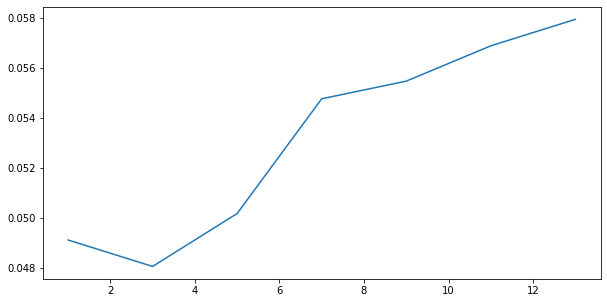

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(k_range, err)

In [77]:
knn_clsfr = KNeighborsClassifier(algorithm='brute', weights='distance')
params = {"n_neighbors":[2, 3, 5, 7], "metric":['consine', 'cityblock']}
grid = GridSearchCV(knn_clsfr, param_grid = params, scoring="accuracy", cv=3)

In [78]:
grid.fit(X_train, y_train)

C:\Users\sanje\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanje\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanje\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\sanje\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_base.py", line 446, in _fit
 

GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(algorithm='brute',
                                            weights='distance'),
             param_grid={'metric': ['consine', 'cityblock'],
                         'n_neighbors': [2, 3, 5, 7]},
             scoring='accuracy')

In [79]:
grid.best_params_

{'metric': 'cityblock', 'n_neighbors': 5}

In [80]:
pred_val = grid.predict(X_val)

In [81]:
confusion_matrix(y_val, pred_val)

array([[2069,   75],
       [  52,  634]], dtype=int64)

In [82]:
pred_train = grid.predict(X_train)
confusion_matrix(y_train, pred_train)

array([[8640,    0],
       [   0, 2680]], dtype=int64)

### Decision Trees

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
pred_train = dtc.predict(X_train)
confusion_matrix(y_train, pred_train)

array([[8640,    0],
       [   0, 2680]], dtype=int64)

In [84]:
pred_val = dtc.predict(X_val)
confusion_matrix(y_val, pred_val)

array([[2079,   65],
       [  56,  630]], dtype=int64)

In [85]:
# this looks like overfitting.
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val)

(1.0, 0.957243816254417)

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight={0:0.24, 1:0.76})
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.24, 1: 0.76}, oob_score=True)

In [87]:
pred_train = rfc.predict(X_train)
pred_val = rfc.predict(X_val)

In [88]:
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val)

(1.0, 0.9724381625441696)

In [89]:
confusion_matrix(y_val, pred_val)

array([[2127,   17],
       [  61,  625]], dtype=int64)

In [90]:
confusion_matrix(y_train, pred_train)

array([[8640,    0],
       [   0, 2680]], dtype=int64)

In [91]:
rfc.feature_importances_

array([0.13840789, 0.11217218, 0.21871299, 0.01156335, 0.09398768,
       0.07490183, 0.03610228, 0.02112502, 0.02147869, 0.01271681,
       0.00127643, 0.0043914 , 0.00208675, 0.00268994, 0.00126429,
       0.00138683, 0.00287251, 0.00042917, 0.0041111 , 0.00458206,
       0.00289659, 0.04921481, 0.02450755, 0.07803896, 0.02759866,
       0.00106491, 0.00069724, 0.00111748, 0.0093013 , 0.02671125,
       0.00771447, 0.00487758])

In [92]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

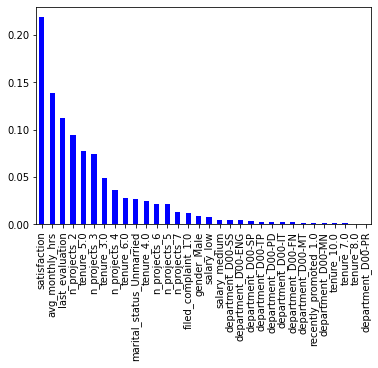

In [93]:
feat_importances_sorted = feat_importances.nlargest(n=len(feat_importances))
feat_importances_sorted.plot(kind='bar', color='blue')
plt.show()

- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

- https://medium.com/@zeeshanmulla/cost-activation-loss-function-neural-network-deep-learning-what-are-these-91167825a4de

Feed Forward Fully Connected Neural Network

In [95]:
X_train.shape

(11320, 32)

In [96]:
X_train.shape[1]

32

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', name= 'inputs'))
model.add(Dense(8, activation='relu', name='hidden'))
model.add(Dense(1, activation='sigmoid', name='output'))

In [98]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (Dense)              (None, 64)                2112      
                                                                 
 hidden (Dense)              (None, 8)                 520       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [101]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/15
1132/1132 [==============================] - 6s 5ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.1197 - val_accuracy: 0.9671
Epoch 2/15
1132/1132 [==============================] - 5s 4ms/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.1176 - val_accuracy: 0.9654
Epoch 3/15
1132/1132 [==============================] - 5s 4ms/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.1318 - val_accuracy: 0.9625
Epoch 4/15
1132/1132 [==============================] - 5s 4ms/step - loss: 0.0456 - accuracy: 0.9848 - val_loss: 0.1253 - val_accuracy: 0.9647
Epoch 5/15
1132/1132 [==============================] - 5s 5ms/step - loss: 0.0429 - accuracy: 0.9854 - val_loss: 0.1331 - val_accuracy: 0.9625
Epoch 6/15
1132/1132 [==============================] - 5s 5ms/step - loss: 0.0442 - accuracy: 0.9851 - val_loss: 0.1301 - val_accuracy: 0.9664
Epoch 7/15
1132/1132 [==============================] - 5s 4ms/step - loss: 0.0420 - accuracy: 0.9844 - val_loss: 0.1337 - val_accuracy:

In [102]:
y_val_pred = model.predict(X_val)

89/89 [==============================] - 1s 3ms/step


In [103]:
y_val_pred[0]

array([0.11749952], dtype=float32)

In [104]:
y_val_pred = [1 if x[0]>=0.5 else 0 for x in y_val_pred]

In [105]:
confusion_matrix(y_val, y_val_pred)

array([[2096,   48],
       [  54,  632]], dtype=int64)

In [106]:
accuracy_score(y_val, y_val_pred)

0.9639575971731449